<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_0_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.8'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n30.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.119198,30.380644,80.249522,0.081810,171.831174,171.746428,0.084746
1,0.0,1.0,49.062167,82.267298,54.386566,0.139430,195.855462,195.731315,0.124147
2,0.0,2.0,48.653011,92.218896,33.070367,0.219671,184.161946,183.956721,0.205225
3,0.0,3.0,42.315509,29.375512,52.525370,-0.084838,134.131552,134.197760,-0.066208
4,0.0,4.0,23.661843,37.726986,39.249263,-0.335472,110.302620,110.603645,-0.301025
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.264803,28.702750,71.004383,-0.085137,179.886798,180.055250,-0.168451
29996,999.0,26.0,60.672015,65.105594,28.925354,0.199179,164.902143,164.706375,0.195767
29997,999.0,27.0,99.509017,94.501909,61.895670,-0.220115,265.686482,265.950368,-0.263886
29998,999.0,28.0,76.501871,75.841690,67.480194,-0.053051,229.770704,229.851324,-0.080620


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.119198  30.380644  80.249522  0.081810  171.831174   
      1.0    49.062167  82.267298  54.386566  0.139430  195.855462   
      2.0    48.653011  92.218896  33.070367  0.219671  184.161946   
      3.0    42.315509  29.375512  52.525370 -0.084838  134.131552   
      4.0    23.661843  37.726986  39.249263 -0.335472  110.302620   
...                ...        ...        ...       ...         ...   
999.0 25.0   70.264803  28.702750  71.004383 -0.085137  179.886798   
      26.0   60.672015  65.105594  28.925354  0.199179  164.902143   
      27.0   99.509017  94.501909  61.895670 -0.220115  265.686482   
      28.0   76.501871  75.841690  67.480194 -0.053051  229.770704   
      29.0   67.949753  45.345177  41.458335  0.080636  164.833900   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    171.746428  0.084746  
      1.0    195.731315  0.124147  
      2.0    183.956721  0.205225  
      3.0    134.197760 -0.066208  
      4.0    110.603645 -0.301025  
...                 ...       ...  
999.0 25.0   180.055250 -0.168451  
      26.0   164.706375  0.195767  
      27.0   265.950368 -0.263886  
      28.0   229.851324 -0.080620  
      29.0   164.801569  0.032331  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.119198  30.380644  80.249522  0.081810  171.831174   
      1.0    49.062167  82.267298  54.386566  0.139430  195.855462   
      2.0    48.653011  92.218896  33.070367  0.219671  184.161946   
      3.0    42.315509  29.375512  52.525370 -0.084838  134.131552   
      4.0    23.661843  37.726986  39.249263 -0.335472  110.302620   
...                ...        ...        ...       ...         ...   
999.0 25.0   70.264803  28.702750  71.004383 -0.085137  179.886798   
      26.0   60.672015  65.105594  28.925354  0.199179  164.902143   
      27.0   99.509017  94.501909  61.895670 -0.220115  265.686482   
      28.0   76.501871  75.841690  67.480194 -0.053051  229.770704   
      29.0   67.949753  45.345177  41.458335  0.080636  164.833900   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    171.746428  0.084746  
      1.0    195.731315  0.124147  
      2.0    183.956721  0.205225  
      3.0    134.197760 -0.066208  
      4.0    110.603645 -0.301025  
...                 ...       ...  
999.0 25.0   180.055250 -0.168451  
      26.0   164.706375  0.195767  
      27.0   265.950368 -0.263886  
      28.0   229.851324 -0.080620  
      29.0   164.801569  0.032331  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.119198,30.380644,80.249522,0.081810,171.831174,171.746428,0.084746
1,0.0,1.0,49.062167,82.267298,54.386566,0.139430,195.855462,195.731315,0.124147
2,0.0,2.0,48.653011,92.218896,33.070367,0.219671,184.161946,183.956721,0.205225
3,0.0,3.0,42.315509,29.375512,52.525370,-0.084838,134.131552,134.197760,-0.066208
4,0.0,4.0,23.661843,37.726986,39.249263,-0.335472,110.302620,110.603645,-0.301025
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.264803,28.702750,71.004383,-0.085137,179.886798,180.055250,-0.168451
29996,999.0,26.0,60.672015,65.105594,28.925354,0.199179,164.902143,164.706375,0.195767
29997,999.0,27.0,99.509017,94.501909,61.895670,-0.220115,265.686482,265.950368,-0.263886
29998,999.0,28.0,76.501871,75.841690,67.480194,-0.053051,229.770704,229.851324,-0.080620


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.119198  30.380644  80.249522  0.081810  171.831174   
      1.0    49.062167  82.267298  54.386566  0.139430  195.855462   
      2.0    48.653011  92.218896  33.070367  0.219671  184.161946   
      3.0    42.315509  29.375512  52.525370 -0.084838  134.131552   
      4.0    23.661843  37.726986  39.249263 -0.335472  110.302620   
...                ...        ...        ...       ...         ...   
999.0 25.0   70.264803  28.702750  71.004383 -0.085137  179.886798   
      26.0   60.672015  65.105594  28.925354  0.199179  164.902143   
      27.0   99.509017  94.501909  61.895670 -0.220115  265.686482   
      28.0   76.501871  75.841690  67.480194 -0.053051  229.770704   
      29.0   67.949753  45.345177  41.458335  0.080636  164.833900   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    171.746428  0.084746  
      1.0    195.731315  0.124147  
      2.0    183.956721  0.205225  
      3.0    134.197760 -0.066208  
      4.0    110.603645 -0.301025  
...                 ...       ...  
999.0 25.0   180.055250 -0.168451  
      26.0   164.706375  0.195767  
      27.0   265.950368 -0.263886  
      28.0   229.851324 -0.080620  
      29.0   164.801569  0.032331  

[30000 rows x 7 columns]

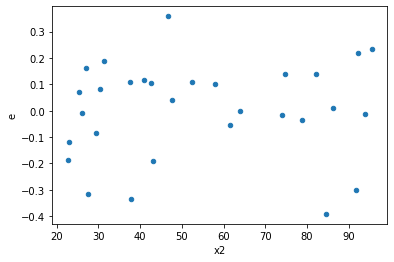

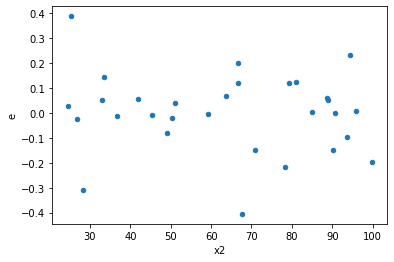

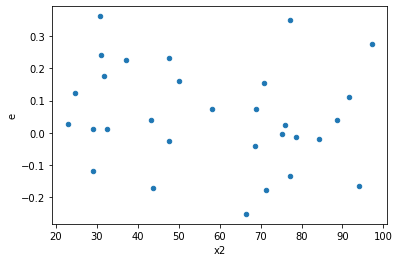

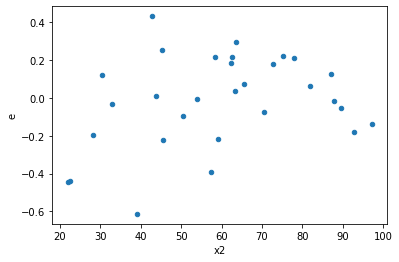

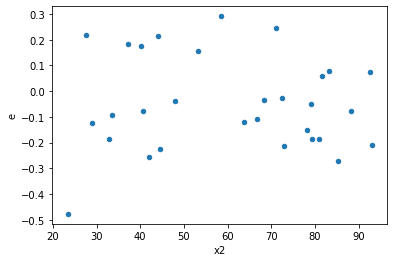

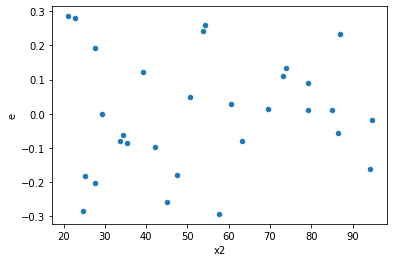

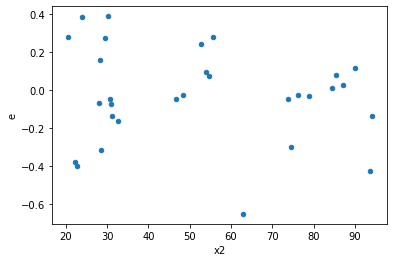

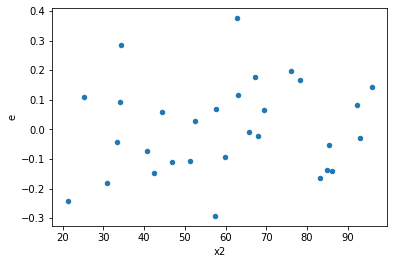

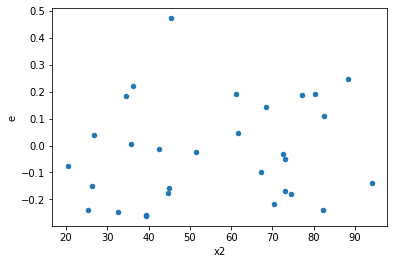

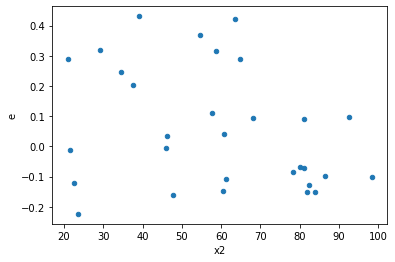

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
7.0,15.0,9.0,0.30684397334836677,0.2102657114511252,0.020456264889891117,0.0233628568279028,1.1420881061942072,0.8677063597168264,0.5661468201415868,0.4338531798584132,Reject001=1 : Homoscedasticity
8.0,12.0,12.0,0.3056676023287801,0.368296513349446,0.025472300194065007,0.030691376112453834,1.2048922114856695,0.7520290381722821,0.623985480913859,0.37601451908614103,Reject001=1 : Homoscedasticity
9.0,12.0,12.0,0.35223975722595297,0.40401952817184555,0.029353313102162746,0.03366829401432046,1.147001495100047,0.8160942516780563,0.5919528741609719,0.40804712583902814,Reject001=1 : Homoscedasticity
14.0,17.0,7.0,0.7980086566053065,0.44087218692747654,0.04694168568266509,0.0629817409896395,1.3417017321322524,0.7236231712122534,0.6381884143938733,0.3618115856061267,Reject001=1 : Homoscedasticity
17.0,18.0,6.0,0.376143362796332,0.25563329871615326,0.02089685348868511,0.04260554978602554,2.03885000242237,0.3859631406675583,0.8070184296662208,0.19298157033377916,Reject001=1 : Homoscedasticity
18.0,12.0,12.0,0.2679247095692268,0.26835953134710744,0.022327059130768902,0.02236329427892562,1.0016229252560531,0.9978051287705165,0.5010974356147417,0.49890256438525826,Reject001=1 : Homoscedasticity
20.0,11.0,13.0,0.2990059175484004,0.7440068648094456,0.027182356140763673,0.05723129729303427,2.1054575621282545,0.20280683334336613,0.8985965833283169,0.10140341667168307,Reject001=1 : Homoscedasticity
21.0,11.0,13.0,0.2887766719946894,0.6066191024495057,0.026252424726789948,0.0466630078807312,1.7774742091961038,0.32230499241032895,0.8388475037948355,0.16115249620516447,Reject001=1 : Homoscedasticity
25.0,15.0,9.0,0.5638460857497484,0.5692120251115382,0.03758973904998322,0.06324578056794869,1.6825277899335913,0.43427977426933184,0.7828601128653341,0.21713988713466592,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,13.0,11.0,0.3908278994079001,0.23562296519287892,0.03006368456983847,0.021420269562988994,0.7124964843623652,0.554778820302941,Reject001=1 : Homoscedasticity
1.0,13.0,11.0,0.4770100724602989,0.2194863176408287,0.03669308249694607,0.019953301603711702,0.5437891898390492,0.2951374290524047,Reject001=1 : Homoscedasticity
2.0,13.0,11.0,0.45961791901434146,0.15762178069762905,0.03535522453956473,0.014329252790693551,0.4052937854957819,0.1243278627874311,Reject001=1 : Homoscedasticity
3.0,13.0,11.0,1.040700262252372,0.4568121346100905,0.08005386632710554,0.041528375873644593,0.5187554053161758,0.26014990639162033,Reject001=1 : Homoscedasticity
4.0,13.0,11.0,0.5209761973821354,0.28478864435624485,0.04007509210631811,0.025889876759658623,0.6460341174256943,0.44942105051556686,Reject001=1 : Homoscedasticity
5.0,12.0,12.0,0.45754530096792695,0.330708019015217,0.03812877508066058,0.02755900158460142,0.7227874886172179,0.5826370579602196,Reject001=1 : Homoscedasticity
6.0,9.0,15.0,0.7067680292697947,0.8186501782212351,0.07852978102997718,0.05457667854808234,0.6949806536102371,0.5913994266754287,Reject001=1 : Homoscedasticity
7.0,15.0,9.0,0.30684397334836677,0.2102657114511252,0.020456264889891117,0.0233628568279028,1.1420881061942072,0.8677063597168264,Reject001=1 : Homoscedasticity
8.0,12.0,12.0,0.3056676023287801,0.368296513349446,0.025472300194065007,0.030691376112453834,1.2048922114856695,0.7520290381722821,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      953
Reject001=0 : Heteroscedasticity     47
Name: Result_test, dtype: int64